In [3]:
from matplotlib import pyplot as plt
import os
import pandas as pd
import numpy as np
import math
from sklearn.feature_extraction.text import CountVectorizer

/Users/shreyailango/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
char_data_post1900 = pd.read_csv('../data/character_table_post1900.tsv', sep = '\t')
char_data_post1900.head(10)

/Users/shreyailango/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,docid,charname,charid,gender,pubdate,words
0,chi.60782167,Spencer,chi.60782167|Spencer,m,1984,opened enter thought realised told awareness c...
1,chi.60782167,DrMelrose,chi.60782167|DrMelrose,u,1984,said took doubled knew knew came person good w...
2,chi.60782167,MrsKirk,chi.60782167|MrsKirk,f,1984,caused arrived making had turn has turned know...
3,chi.60782167,Kevin,chi.60782167|Kevin,m,1984,said expect going wanted said hearing stay ski...
4,chi.60782167,DrSmidt,chi.60782167|DrSmidt,m,1984,present said sighed fumbled gave said read off...
5,chi.60782167,DrWilson,chi.60782167|DrWilson,m,1984,pointed said questions gentle was-satisfied wa...
6,chi.60782167,DrSwift,chi.60782167|DrSwift,m,1984,came asked waited had failed asked settled sai...
7,chi.60782167,Sim,chi.60782167|Sim,m,1984,came thought felt misconstrued seized told col...
8,chi.60782167,Mary,chi.60782167|Mary,f,1984,arrived kissed sank been teased arched pushed ...
9,chi.60782167,Josh,chi.60782167|Josh,m,1984,gasped knew expect backed waited sat decided d...


/Users/shreyailango/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


m    1407110
f     637064
Name: gender, dtype: int64


<AxesSubplot:title={'center':'Gender proportions'}>

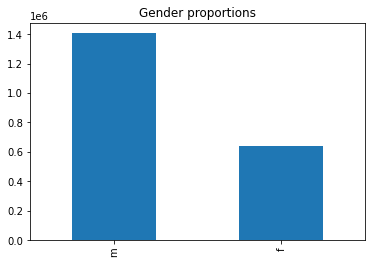

In [4]:
male_data = char_data_post1900[char_data_post1900.gender == "m"]["words"]
female_data = char_data_post1900[char_data_post1900.gender == "f"]["words"]
char_data_post1900 = char_data_post1900.loc[char_data_post1900['gender'] != 'u', : ]
print(char_data_post1900['gender'].value_counts())
char_data_post1900['gender'].value_counts().plot(kind='bar', title='Gender proportions')

In [5]:
vectorizer = CountVectorizer(max_features = 2000)
sparse_wordcounts = vectorizer.fit_transform(char_data_post1900["words"])
wordcounts = sparse_wordcounts.toarray()
charwords = pd.DataFrame(wordcounts, columns = vectorizer.get_feature_names())

/Users/shreyailango/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
male_words = charwords.loc[char_data_post1900.gender == 'm', :].sum(axis = 'rows')
female_words = charwords.loc[char_data_post1900.gender == 'f', :].sum(axis = 'rows')

/Users/shreyailango/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [18]:
def get_dunnings(word, series1, series2):
    observed = pd.DataFrame({'series1': [series1[word], sum(series1) - series1[word]],
                          'series2': [series2[word], sum(series2) - series2[word]]},
                        index = ['word', 'all_others'])
    total_words = observed.to_numpy().sum()
    observed['word_totals'] = observed.sum(axis = 1)
    observed = observed.append(observed.sum(axis = 0).rename(index = 'group_totals'))
    observed.iat[2,2] = 0
    observed['word_totals'] = observed['word_totals'] / sum(observed['word_totals'])
    observed.loc['group_totals', : ] = observed.loc['group_totals', : ] / sum(observed.loc['group_totals', : ])
    expected = np.outer(observed['word_totals'][0:2], observed.loc['group_totals', : ][0:2])
    expected = pd.DataFrame(expected, index = ['word', 'all_others'], columns = ['series1', 'series2'])
    expected = expected * total_words
    
    G = 0
    for i in range(2):
        for j in range(2):
            O = observed.iat[i, j] + .000001
            E = expected.iat[i, j] + .000001
            G = G + O * math.log(O / E)
    
    if (observed.iat[0, 0] / sum(observed.iloc[0: 2, 0])) < (observed.iat[0, 1] / sum(observed.iloc[0 : 2, 1])):
        G = -G    # we provide a signed version of the statistic to distinguish
                  # overrepresentation in the two categories
    
    return 2 * G

/Users/shreyailango/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
dunningslist = []

for w in vectorizer.get_feature_names():
    G = get_dunnings(w, female_words,male_words)
    dunningslist.append(G)

dunnings = pd.Series(dunningslist, index = vectorizer.get_feature_names())
dunnings = dunnings.sort_values()

/Users/shreyailango/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
dunnings[0:50]

/Users/shreyailango/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


knew         -979587.071855
see          -480421.336201
good         -480421.336201
dr           -480421.336201
came         -480421.336201
took         -480421.336201
better       -480421.336201
person       -480421.336201
was          -329572.286433
prince             0.000000
private            0.000000
probably           0.000000
problem            0.000000
produced           0.000000
proceeded          0.000000
professor          0.000000
promise            0.000000
promised           0.000000
problems           0.000000
pride              0.000000
abandoned          0.000000
proper             0.000000
pretty             0.000000
pretended          0.000000
pretend            0.000000
pressed            0.000000
press              0.000000
president          0.000000
presented          0.000000
present            0.000000
presence           0.000000
prepared           0.000000
price              0.000000
prevent            0.000000
protect            0.000000
proposed           0

In [28]:
dunnings[1950:]

/Users/shreyailango/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


fix               0.000000
fist              0.000000
five              0.000000
fond              0.000000
fit               0.000000
finished          0.000000
finish            0.000000
four              0.000000
found             0.000000
fought            0.000000
forward           0.000000
finding           0.000000
forty             0.000000
fortune           0.000000
form              0.000000
forgotten         0.000000
forgot            0.000000
forgive           0.000000
forget            0.000000
forever           0.000000
finds             0.000000
forehead          0.000000
forced            0.000000
force             0.000000
footsteps         0.000000
fine              0.000000
foot              0.000000
fingers           0.000000
foolish           0.000000
fool              0.000000
food              0.000000
fists             0.000000
finger        99806.042370
ears          99806.042370
nurse         99806.042370
realised      99806.042370
tells         99806.042370
d